In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import randint, uniform

In [2]:
import tensorflow as tf 

from pathlib import Path 

import re

## IMPORT & EXPLORE

#### FUNCTIONS

In [3]:
def directory_files(directory, item_type=None):
    return sorted([str(path) for path in directory.rglob(f'*.{item_type}')])

In [4]:
def load_images_with_ids(image_paths, target_size=(224, 224)):
    loaded_images = {}

    for path in image_paths:
        try:
            # Extract listing ID using regex
            match = re.search(r'listing_(\d+)', path)
            if not match:
                print(f"Could not extract ID from path: {path}")
                continue

            listing_id = match.group(1)

            # Load and preprocess image
            image = tf.io.read_file(path)
            image = tf.image.decode_image(image, channels=3)
            image = tf.image.resize(image, target_size)
            image = image / 255.0
            image.set_shape((target_size[0], target_size[1], 3))

            # Store using listing ID
            loaded_images[listing_id] = image

        except Exception as e:
            print(f"Error loading image at {path}: {e}")

    return loaded_images


In [5]:
def display_examples(images, labels, num_examples=5):
    plt.figure(figsize=(15, 5))

    for i in range(min(num_examples, len(images))):
        ax = plt.subplot(1, num_examples, i + 1)
        ax.imshow(images[i].numpy() if hasattr(images[i], 'numpy') else images[i])
        ax.set_title(f"Label: {labels[i]}", fontsize=10)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

#### DATA

##### IMAGES

In [6]:
almaty_rentals_pictures_directory = Path(r"C:\Users\User\Downloads\almaty_rentals_test")

In [7]:
almaty_rentals_pictures_directory_files = directory_files( directory = almaty_rentals_pictures_directory,
                                                           item_type = 'jpg' )

In [8]:
len(almaty_rentals_pictures_directory_files)

10495

In [9]:
almaty_rentals_pictures_directory_files

['C:\\Users\\User\\Downloads\\almaty_rentals_test\\images\\listing_1000100195\\image_01.jpg',
 'C:\\Users\\User\\Downloads\\almaty_rentals_test\\images\\listing_1000101301\\image_01.jpg',
 'C:\\Users\\User\\Downloads\\almaty_rentals_test\\images\\listing_1000102243\\image_01.jpg',
 'C:\\Users\\User\\Downloads\\almaty_rentals_test\\images\\listing_1000103164\\image_01.jpg',
 'C:\\Users\\User\\Downloads\\almaty_rentals_test\\images\\listing_1000104056\\image_01.jpg',
 'C:\\Users\\User\\Downloads\\almaty_rentals_test\\images\\listing_1000105972\\image_01.jpg',
 'C:\\Users\\User\\Downloads\\almaty_rentals_test\\images\\listing_1000106114\\image_01.jpg',
 'C:\\Users\\User\\Downloads\\almaty_rentals_test\\images\\listing_1000107491\\image_01.jpg',
 'C:\\Users\\User\\Downloads\\almaty_rentals_test\\images\\listing_1000107506\\image_01.jpg',
 'C:\\Users\\User\\Downloads\\almaty_rentals_test\\images\\listing_1000108183\\image_01.jpg',
 'C:\\Users\\User\\Downloads\\almaty_rentals_test\\images\\l

##### CSV

In [10]:
krisha_almaty_rental = pd.read_csv(r"C:\Users\User\Downloads\krisha_almaty_rental.csv.gz")

In [11]:
krisha_almaty_rental.sample(3)

,floor,total_floors,area_sqm,rooms,price,full_address_code,furniture_code,parking_code,security_code,bathroom_code,contact_name,title,url,id
1002,11.0,13.0,55.0,2,400000,4,18.0,1,32.0,5,Жаскайратов Жалгас,2-комнатная квартира · 55 м² · 11/13 этаж · по...,https://krisha.kz/a/show/1000915589?srchid=019...,1000915589
5155,2.0,6.0,55.0,3,370000,4,18.0,1,32.0,5,Хозяин недвижимости,3-комнатная квартира · 55 м² · 2/6 этаж · поме...,https://krisha.kz/a/show/695983939?srchid=0196...,695983939
3425,6.0,16.0,78.0,2,400000,4,34.0,1,32.0,5,Султан Сакен,2-комнатная квартира · 78 м² · 6/16 этаж · пом...,https://krisha.kz/a/show/1001159116?srchid=019...,1001159116


In [40]:
krisha_almaty_rental[(krisha_almaty_rental['id'] == 1000107506)]

,floor,total_floors,area_sqm,rooms,price,full_address_code,furniture_code,parking_code,security_code,bathroom_code,contact_name,title,url,id
6601,11.0,16.0,65.0,1,250000,4,18.0,1,32.0,1,Respect,1-комнатная квартира · 65 м² · 11/16 этаж · по...,https://krisha.kz/a/show/1000107506?srchid=019...,1000107506


In [21]:
krisha_almaty_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10068 entries, 0 to 10067
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   floor              10068 non-null  float64
 1   total_floors       10068 non-null  float64
 2   area_sqm           10068 non-null  float64
 3   rooms              10068 non-null  int64  
 4   price              10068 non-null  int64  
 5   full_address_code  10068 non-null  int64  
 6   furniture_code     10068 non-null  float64
 7   parking_code       10068 non-null  int64  
 8   security_code      10068 non-null  float64
 9   bathroom_code      10068 non-null  int64  
 10  contact_name       10068 non-null  object 
 11  title              10068 non-null  object 
 12  url                10068 non-null  object 
 13  id                 10068 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


Each row in clean csv file has it's main image in "almaty_rentals_pictures_directory_files"

## CLEAN & PREPARE

#### IMAGE LOAD

In [12]:
almaty_rentals_pictures = load_images_with_ids( image_paths = almaty_rentals_pictures_directory_files,
                                                target_size = (224, 224) )

In [45]:
almaty_rentals_pictures

{'1000100195': <tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.6969475 , 0.8498887 , 0.87733966],
         [0.6544868 , 0.8134129 , 0.8531888 ],
         [0.5829482 , 0.7436625 , 0.84327734],
         ...,
         [0.5023811 , 0.70630264, 0.8592438 ],
         [0.53672826, 0.7019933 , 0.8434493 ],
         [0.55187345, 0.64739174, 0.6901092 ]],
 
        [[0.7374275 , 0.8783938 , 0.90118545],
         [0.70922995, 0.85803944, 0.8817014 ],
         [0.6417254 , 0.79549444, 0.8714398 ],
         ...,
         [0.5023811 , 0.70630264, 0.8592438 ],
         [0.5458008 , 0.71106577, 0.85252184],
         [0.55686504, 0.6523834 , 0.6951008 ]],
 
        [[0.79796165, 0.916978  , 0.929478  ],
         [0.7734719 , 0.9103766 , 0.9082408 ],
         [0.7102078 , 0.84753275, 0.8869235 ],
         ...,
         [0.5019608 , 0.7058824 , 0.85882354],
         [0.54045475, 0.70571977, 0.84717584],
         [0.54404396, 0.6395623 , 0.68227977]],
 
        ...,
 
        [[0.107667

In [62]:
krisha_almaty_rental[(krisha_almaty_rental['id'] == 1000100195)]['url']

1697    https://krisha.kz/a/show/1000100195?srchid=019...
Name: url, dtype: object

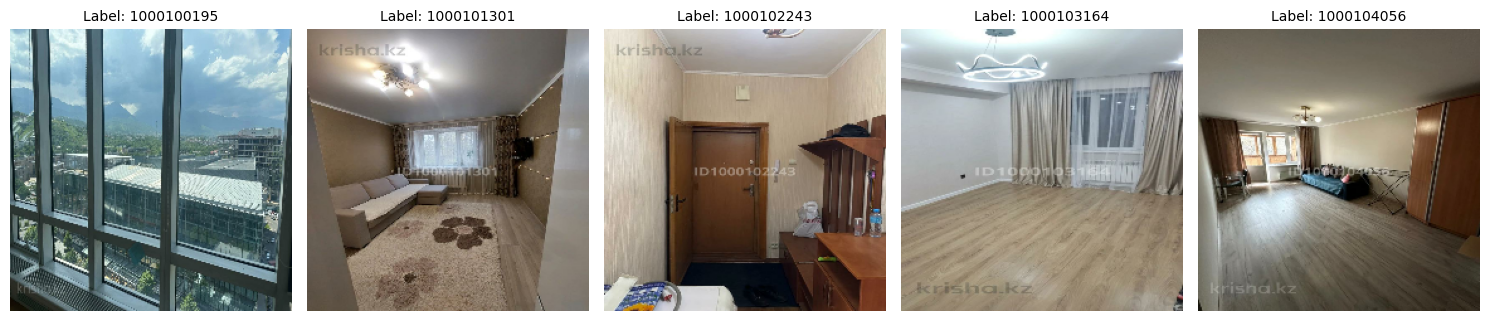

In [61]:
display_examples( images = list(almaty_rentals_pictures.values()),
                  labels = list(almaty_rentals_pictures.keys()),
                  num_examples = 5 )

As we can see, those ID can allows us to access each listing url 

## MODEL BUILD

In [3]:
from tensorflow.keras.applications import MobileNetV3Small

from tensorflow.keras import models, layers


In [4]:
mobilenetv3 = MobileNetV3Small( weights = 'imagenet',
                                include_top = False )

C:\Users\User\anaconda3\Lib\site-packages\keras\src\applications\mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


In [5]:
gap2d_layer = layers.GlobalAveragePooling2D()

In [6]:
krisha_image_mobilenetv3 = models.Sequential([

    mobilenetv3,
    gap2d_layer
                                
])

In [7]:
krisha_image_mobilenetv3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)        │ (None, None, None, 576)     │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 939,120 (3.58 MB)

 Trainable params: 927,008 (3.54 MB)

 Non-trainable params: 12,112 (47.31 KB)

Our "krisha_image_mobilenetv3" output shape is (None, 576), which means that it produces 1D vector of 576 length

In [19]:
almaty_rentals_pictures_batch = tf.stack( list(almaty_rentals_pictures.values()) )

krisha_image_mobilenetv3_embedings = krisha_image_mobilenetv3.predict(almaty_rentals_pictures_batch)


328/328 ━━━━━━━━━━━━━━━━━━━━ 40s 116ms/step


In [69]:
krisha_image_mobilenetv3_embedings

array([[ 0.        ,  0.        , -0.14389887, ..., -0.15936725,
        -0.04933371,  0.        ],
       [ 0.        ,  0.        , -0.16164687, ..., -0.15162963,
        -0.04697128,  0.        ],
       [ 0.        ,  0.        , -0.14822885, ..., -0.16121437,
        -0.04493707,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.15968142, ..., -0.15254462,
        -0.05285237,  0.        ],
       [ 0.        ,  0.        , -0.1552295 , ..., -0.16011983,
        -0.04623722,  0.        ],
       [ 0.        ,  0.        , -0.15463036, ..., -0.15269795,
        -0.04939325,  0.        ]], dtype=float32)

#### CONNECT EMBEDINGS

In [22]:
almaty_rentals_pictures_ids = list(almaty_rentals_pictures.keys())

In [40]:
krisha_image_mobilenetv3_embedings_df = pd.DataFrame( data = krisha_image_mobilenetv3_embedings,
                                                      index = pd.Index( almaty_rentals_pictures_ids, name = 'id') ).reset_index()



krisha_image_mobilenetv3_embedings_df['id'] = krisha_image_mobilenetv3_embedings_df['id'].astype('int')


In [44]:
#### MERGE
krisha_almaty_rental_ext = pd.merge( krisha_almaty_rental,
                                     krisha_image_mobilenetv3_embedings_df,
                                     on = 'id')


In [57]:
krisha_almaty_rental_ext.sample(5)

,floor,total_floors,area_sqm,rooms,price,full_address_code,furniture_code,parking_code,security_code,bathroom_code,...,566,567,568,569,570,571,572,573,574,575
5212,3.0,9.0,36.0,1,300000,4,46.0,1,32.0,2,...,-0.206914,-0.208467,-0.132828,-0.003189,0.353492,-0.047958,-0.213693,-0.152519,-0.046598,0.0
6258,1.0,4.0,87.0,3,390000,2,34.0,1,32.0,1,...,-0.228270,-0.221720,-0.130227,-0.002191,0.382654,-0.047512,-0.231050,-0.153787,-0.047075,0.0
554,7.0,12.0,35.0,1,300000,4,17.0,1,32.0,5,...,-0.228917,-0.212153,-0.124156,-0.001220,0.394358,-0.063111,-0.227689,-0.147825,-0.052032,0.0
4880,5.0,6.0,200.0,4,1700000,4,18.0,1,32.0,1,...,-0.227903,-0.214211,-0.143790,-0.000946,0.396035,-0.044331,-0.235388,-0.140584,-0.048522,0.0
2925,4.0,5.0,55.0,2,270000,3,20.0,1,32.0,2,...,-0.222290,-0.219450,-0.130480,-0.001076,0.411036,-0.050635,-0.235198,-0.150763,-0.045540,0.0


In [60]:
krisha_almaty_rental_ext_corr = krisha_almaty_rental_ext.select_dtypes(include = ('number')).corr()

krisha_almaty_rental_ext_corr[['price']].sort_values( by = 'price', ascending = False ).head(15)


,price
price,1.000000
area_sqm,0.444677
rooms,0.355989
total_floors,0.170236
floor,0.153409
505,0.111608
189,0.105777
377,0.102606
363,0.100439
475,0.093400


In [62]:

#### SAVE

krisha_almaty_rental_ext.to_csv('krisha_almaty_rental_ext.csv.gz',compression = 'gzip',index = False)



In [63]:
#### TEST LOAD 

krisha_almaty_rental_ext = pd.read_csv(r"C:\Users\User\Downloads\krisha_almaty_rental_ext.csv.gz")


In [65]:
krisha_almaty_rental_ext['id']

0       1000488556
1       1000777759
2        695662173
3       1001209285
4        688943868
           ...    
9782    1000999440
9783    1000999429
9784    1000999373
9785     699871895
9786     761042235
Name: id, Length: 9787, dtype: int64

#### MODEL SAVE

In [9]:
krisha_image_mobilenetv3.save('krisha_image_mobilenetv3.keras')